In [1]:
###### Applications Lab #1-- ATOC7500 Objective Analysis
##### Originally coded by Prof. Jennifer Kay (CU) with input from Elizabeth Maroon (CU ATOC/CIRES Postdoc 2018)
##### last updated August 26, 2020

###LEARNING GOALS:
###1) Working in an ipython notebook: read in netcdf file, make line plots and histograms
###2) Calculate statistical significance of the changes in the normalized mean using a z-statistic and a t-statistic
###3) Calculate confidence intervals on CESM-LE global warming using z-statistic and t-statistic

# Import the packages and general set-up
%matplotlib inline  
# this enables plotting within notebook
import matplotlib   # library for plotting
import matplotlib.pyplot as plt # basic plotting; later you will type plt.$COMMAND
import numpy as np # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html  
import xarray  ##netcdf manipulation - slick array manipulation

In [15]:
import os #change directory to where there is data, not local GitHub repo
os.chdir('/Users/chwy8767/Google Drive/ATOC_7500_Data_Analysis/Lab1')

## LEARNING GOAL #1 -  Read in the data from netcdf files
These data are global annual mean surface temperatures from the CESM Large Ensemble Project (https://doi.org/10.1175/BAMS-D-13-00255.1.

In [17]:
fname="TS_timeseries_cesmle_1920_2100.nc"
ds=xarray.open_dataset(fname)
fname1="TS_timeseries_cesmle_1850.nc"
ds1=xarray.open_dataset(fname1)

gts=ds["gts_ann_allcesmle"] #Annual average global surface Temperature by member and year (1920-2100) with hist/RCP8.5 forcings
ats=ds["ats_ann_allcesmle"] #This is never used - atmoshperic value?
year=ds["year"]
gts_1850=ds1["gts_annual"] #Annual average global surface temperature PI 1850 control (1-1801 arbitrary years)

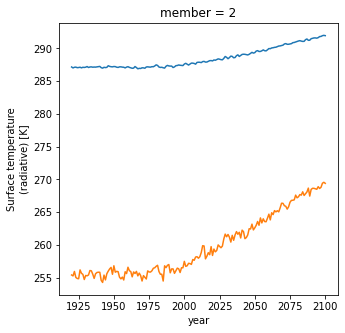

In [65]:
gts.sel(member=2).plot()
ats.sel(member=2).plot()

### Annual mean temperature timeseries from PI 1850

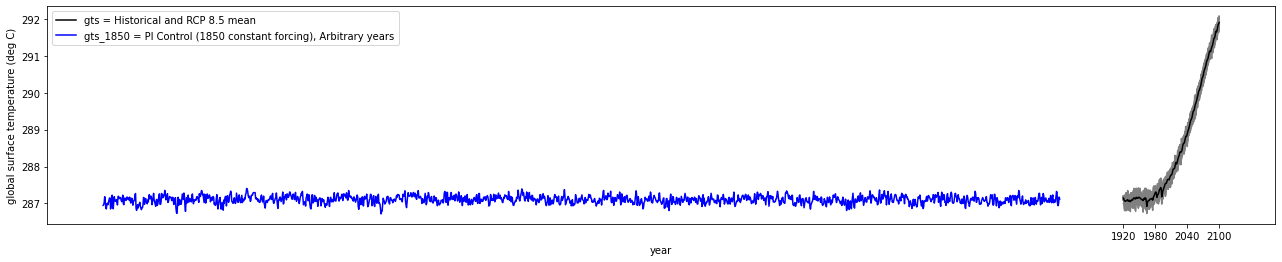

In [78]:
## Let's make a quick line plot of global annual mean temperature timeseries 
## from the 1850 control and the ensemble members.
plt.rcParams["figure.figsize"] = [22,4]
[plt.plot(year,gts.sel(member=i),color="grey") for i in range(1,31)]; ## plot all ensemble members
plt.plot(year,gts.mean("member"),color="black", label='gts = Historical and RCP 8.5 mean');  ## plot ensemble mean
plt.plot(gts_1850,color="blue", label='gts_1850 = PI Control (1850 constant forcing), Arbitrary years');  ## add ";" to not print to screen plotting comments
plt.legend()

plt.xlabel('year')
plt.ylabel('global surface temperature (deg C)')
plt.xticks(np.arange(1920,2101,60),["1920","1980","2040","2100"]);

## LEARNING GOAL #2 - Assess global warming in LE, compare to 1850 PI control

In [24]:
#### With the 1850 control we have the opportunity to calculate population statistics with constant forcing.
#### Let's find the population mean and population standard deviation from the 1850 control.  
gts_1850_mean=np.mean(gts_1850)
gts_1850_std=np.std(gts_1850)
print("Mean 1850 global mean surface temperature:", np.str(np.round(gts_1850_mean.values,2)),'K')
print("Standard deviation in 1850 global mean surface temperature:", np.str(np.round(gts_1850_std.values,2)), 'K')

Mean 1850 global mean surface temperature: 287.11 K
Standard deviation in 1850 global mean surface temperature: 0.1 K


### Standardize the data using the equation below and plot a histogram
# $z= \frac{x-\mu}{\sigma}$

Standardized mean and std in 1850 global mean surface temperature:
0.0
1.0


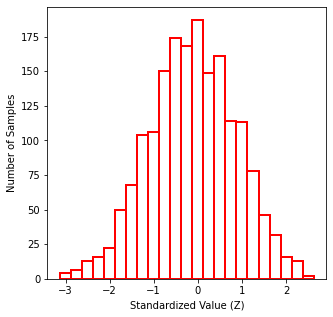

In [25]:
gts_1850_norm=(gts_1850-gts_1850_mean)/gts_1850_std #eq above
gts_1850_norm_mean=np.mean(gts_1850_norm).values
gts_1850_norm_std=np.std(gts_1850_norm).values
print("Standardized mean and std in 1850 global mean surface temperature:")
print(np.str(np.round(gts_1850_norm_mean,2)))
print(np.str(np.round(gts_1850_norm_std,2)))

xinc = np.arange(-3,3,.25)
hx=np.histogram(gts_1850_norm,xinc)
plt.rcParams["figure.figsize"] = [5,5]
plt.bar(hx[1][:-1],hx[0],edgecolor = 'r', color = [], width = .25, linewidth = 2);
plt.ylabel('Number of Samples');
plt.xlabel('Standardized Value (Z)');

## another histogram option to try (might be deprecated)
#xinc = np.arange(-3,3,.25);
#plt.hist(gts_1850_norm,xinc);
#plt.ylabel('Number of Samples');
#plt.xlabel('Standardized Value (Z)');

In [150]:
stats.kstest(hx[0], hx[1]) #don't know if this says anything, but it looks Gaussian

KstestResult(statistic=0.9565217391304348, pvalue=5.830225191516547e-12)

nyears:30
Standardized mean CESM LE member 1: 0.07


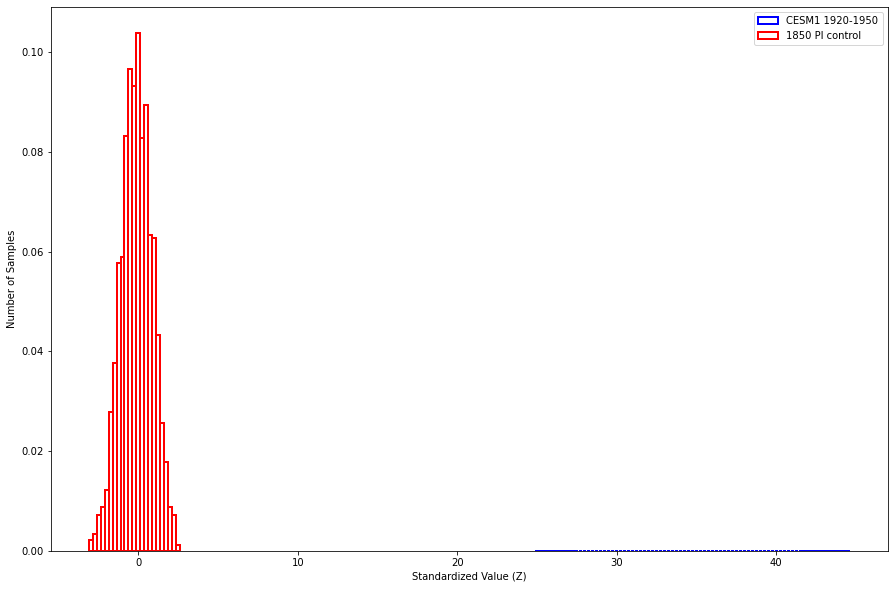

In [175]:
### Next let's calculate the global warming in the first ensemble member over a given time period.
### Our end goal is compare this warming to the 1850 control run and assess if the warming is statistically significant.

### Start by standardizing member 1 data (only 2020-2030!!) using the 1850 control mean and standard deviation
startyear=1920
endyear=1950
nyrs=(endyear-startyear)
print("nyears:"+np.str(nyrs))
gts_mem1=gts.sel(member=1).sel(year=slice(startyear,endyear-1))
#print(gts_mem1)
gts_mem1_norm=(gts_mem1-gts_1850_mean)/gts_1850_std

print("Standardized mean CESM LE member 1:", np.round(np.mean(gts_mem1_norm).values,2))

## plot a histogram to see the range of values
plt.figure(figsize=[15,10])
xinc = np.arange(25,45,.25)
hx=np.histogram(gts_mem1_norm,xinc);
plt.bar(hx[1][:-1],hx[0]/(endyear-startyear),edgecolor = 'b', color = [], width = .2, linewidth = 2, label='CESM1 {}-{}'.format(str(startyear), str(endyear)));

xinc = np.arange(-3,3,.25)
hx=np.histogram(gts_1850_norm,xinc)
plt.rcParams["figure.figsize"] = [5,5]
plt.bar(hx[1][:-1],hx[0]/1801,edgecolor = 'r', color = [], width = .25, linewidth = 2, label='1850 PI control');

plt.ylabel('Number of Samples')
plt.xlabel('Standardized Value (Z)')
plt.legend()

## another histogram option to try (might be deprecated)
#xinc = np.arange(-20,20,.25)
#plt.hist(gts_mem1_norm,xinc)
#plt.ylabel('Number of Samples')
#plt.xlabel('Standardized Value (Z)')

### z-statistic for 2020-2029 annual mean temperature for 1850 PI. Barnes (86)
## $z= \frac{\overline{X} - \mu_{\overline{X}}}{\sigma_{\overline{X}}} = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{N}}}$

What is the probability that the mean annual global mean temperature was X **assuming no global warming**?
<br />
Test sample mean (member 1, 2020-2029) is equal to the population mean (null hypothesis)
<br />
**N.B Assume that the Global Mean Annual Temperature is standard normal.**

In [177]:
sample_mean=np.mean(gts_mem1_norm).values
print('Sample mean:',np.str(np.round(sample_mean,2)))
print('Sample SD  :',np.str(np.round(np.std(gts_mem1_norm).values,2)))
population_mean=gts_1850_norm_mean
population_std=gts_1850_norm_std
xstd=population_std/np.sqrt(nyrs) #standard error
z=(sample_mean-population_mean)/xstd #this is the equation (86) on the right
print("z-statistic:", np.round(z,4))
prob=(1-stats.norm.cdf(z))*100   #N.B this is out of precision so prob>>0.999999999999999...
print("Probability:", prob, '%')

Sample mean: 0.07
Sample SD  : 0.82
z-statistic: 0.4041
Probability: 34.30518798095269 %


### Then use Barnes (96) below to calculate the t-statistic
## $t= \frac{\overline{x}-\mu}{\frac{s}{\sqrt{N-1}}}$

In [178]:
sample_mean=np.mean(gts_mem1_norm).values
sample_std=np.std(gts_mem1_norm).values
t=(sample_mean-population_mean)/(sample_std/(np.sqrt(nyrs-1)))
print("t-statistic:", np.round(t,4))
prob_t=(1-stats.t.cdf(t,nyrs-1))*100
print("Probability:", np.round(prob_t,15), '%')

t-statistic: 0.4829
Probability: 31.638996525096353 %


## LEARNING GOAL #3 - Calculate confidence intervals on LE global warming using z-statistic and t-statistic

In [180]:
### Use the code below to calculate how much global warming occurred over the 21st century in both 
### individual ensemble members and the ensemble mean.

## Compare 21st century global warming: one member vs. ensemble mean
gw_mem1=gts.sel(member=1).sel(year=slice(2080,2100)).mean("year")- \
        gts.sel(member=1).sel(year=slice(2000,2020)).mean("year")
gw_mean=(gts.sel(year=slice(2080,2100)).mean("year").mean("member"))- \
        (gts.sel(year=slice(2000,2020)).mean("year").mean("member"))
print('Member 1 warming ',np.round(gw_mem1.values,2), 'K')
print('Ensemble Mean warming',np.round(gw_mean.values,2),'K')

Member 1 warming  3.7 K
Ensemble Mean warming 3.63 K


In [200]:
## Next - let's calculate emsemble statistics about 21st century global warming
nmembers=30
temp=(gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")-\
      gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year"))
gw_mean_mem=temp.mean("member")
gw_std_mem=temp.std("member")
gw_min_mem=temp.min("member")
gw_max_mem=temp.max("member")
print("(2080 to 2100 - 2020 to 2000) member mean: ",np.str(np.round(gw_mean_mem.values,2)))
print("(2080 to 2100 - 2020 to 2000) member stdev: ",np.str(np.round(gw_std_mem.values,2)))
print("(2080 to 2100 - 2020 to 2000) member min: ",np.str(np.round(gw_min_mem.values,2)))
print("(2080 to 2100 - 2020 to 2000) member max: ",np.str(np.round(gw_max_mem.values,2)))

(2080 to 2100 - 2020 to 2000) member mean:  3.63
(2080 to 2100 - 2020 to 2000) member stdev:  0.06
(2080 to 2100 - 2020 to 2000) member min:  3.51
(2080 to 2100 - 2020 to 2000) member max:  3.75


### Calculate confidence intervals

In [209]:
### Let's add confidence intervals to the estimated global warming
### Specifically - we'll compare confidence intervals calculated using t-statistic and z-statistic

#### Calculate the 95% and 99% confidence limits on the 21st century warming using t-statistic
#### Assume that the global warming is normally distributed.
N=nmembers
print('Number of members =',N)
df=N-1

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
tstat95=stats.t.ppf(0.975,df)
low_limit95=gw_mean_mem-tstat95*(gw_std_mem/np.sqrt(nmembers-1))
high_limit95=gw_mean_mem+tstat95*(gw_std_mem/np.sqrt(nmembers-1))
print("95% confidence limits - t-statistic")
print('Low limit =',np.round(low_limit95.values,4))
print('High limit=',np.round(high_limit95.values,4))

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
tstat99=stats.t.ppf(0.995,df)
low_limit99=gw_mean_mem-tstat99*(gw_std_mem/np.sqrt(nmembers-1))
high_limit99=gw_mean_mem+tstat99*(gw_std_mem/np.sqrt(nmembers-1))
print("99% confidence limits - t-statistic")
print('Low limit =',np.round(low_limit99.values,4))
print('High limit=',np.round(high_limit99.values,4))

#### Calculate the 95% and 99% confidence limits on the 21st century warming using z-statistic
#### Assume that the global warming is normally distributed.

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
zstat95=stats.norm.ppf(0.975)
low_limit95=gw_mean_mem-zstat95*(gw_std_mem/np.sqrt(nmembers))
high_limit95=gw_mean_mem+zstat95*(gw_std_mem/np.sqrt(nmembers))
print("95% confidence limits - z-statistic")
print('Low limit =',np.round(low_limit95.values,4))
print('High limit=',np.round(high_limit95.values,4))

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
zstat99=stats.norm.ppf(0.995)
low_limit99=gw_mean_mem-zstat99*(gw_std_mem/np.sqrt(nmembers))
high_limit99=gw_mean_mem+zstat99*(gw_std_mem/np.sqrt(nmembers))
print("99% confidence limits - z-statistic")
print('Low limit =',np.round(low_limit99.values,4))
print('High limit=',np.round(high_limit99.values,4))

Number of members = 30
95% confidence limits - t-statistic
Low limit = 3.6095
High limit= 3.6572
99% confidence limits - t-statistic
Low limit = 3.6013
High limit= 3.6655
95% confidence limits - z-statistic
Low limit = 3.6109
High limit= 3.6558
99% confidence limits - z-statistic
Low limit = 3.6039
High limit= 3.6629


6
[3.695221  3.636963  3.652832  3.6441956 3.634613  3.5675354]


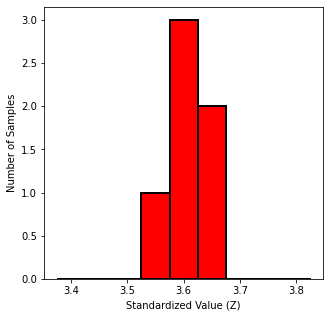

In [221]:
#### plot a histogram of global warming - Was normal distribution a good approximation?
print(nmembers)
gw_allmem=gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")- \
        gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year")
print(gw_allmem.values)

## plot a histogram to see the range of values
xinc = np.arange(3.4,3.9,.05)
#print(xinc)
hx=np.histogram(gw_allmem,xinc)
plt.bar(hx[1][:-1],hx[0],edgecolor = 'k', color = 'r', width = .05, linewidth = 2);
plt.ylabel('Number of Samples');
plt.xlabel('Standardized Value (Z)');

### another histogram option
#xinc = np.arange(3.5,3.8,.05)
#plt.hist(gw_allmem,xinc);
#plt.ylabel('Number of Samples');
#plt.xlabel('Standardized Value (Z)');

In [222]:
#### What if you you only had 6 ensemble members?  Estimate your confidence interval using a t-statistic.
## Calculate statistics for the 21st century global warming
nmembers=2
temp=(gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")-\
      gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year"))
print(temp)
gw_mean_mem=temp.mean("member")
gw_std_mem=temp.std("member")
gw_min_mem=temp.min("member")
gw_max_mem=temp.max("member")

print("mean: ",np.str(np.round(gw_mean_mem.values,2)))
print("stdev: ",np.str(np.round(gw_std_mem.values,2)))
print("min: ",np.str(np.round(gw_min_mem.values,2)))
print("max: ",np.str(np.round(gw_max_mem.values,2)))

<xarray.DataArray 'gts_ann_allcesmle' (member: 2)>
array([3.695221, 3.636963], dtype=float32)
Coordinates:
  * member   (member) int32 1 2
mean:  3.67
stdev:  0.03
min:  3.64
max:  3.7


In [225]:
#### Calculate the 95% and 99% confidence limits on the 21st century warming using t-statistic
#### Assume that the global warming is normally distributed.  (See page 18 of Barnes notes)
N=nmembers
df=N-1
print('Number of members =',N)

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
tstat95=stats.norm.ppf(0.975,df) #N.B this is changed from original which erroneously had stats.t
low_limit95=gw_mean_mem-tstat95*(gw_std_mem/np.sqrt(nmembers-1))
high_limit95=gw_mean_mem+tstat95*(gw_std_mem/np.sqrt(nmembers-1))
print("95% confidence limits - t-statistic")
print('Low limit =',np.round(low_limit95.values,4))
print('High limit=',np.round(high_limit95.values,4))

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
tstat99=stats.norm.ppf(0.995,df)
low_limit99=gw_mean_mem-tstat99*(gw_std_mem/np.sqrt(nmembers-1))
high_limit99=gw_mean_mem+tstat99*(gw_std_mem/np.sqrt(nmembers-1))
print("99% confidence limits - t-statistic")
print('Low limit =',np.round(low_limit99.values,4))
print('High limit=',np.round(high_limit99.values,4))

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
zstat95=stats.norm.ppf(0.975)
low_limit95=gw_mean_mem-zstat95*(gw_std_mem/np.sqrt(nmembers))
high_limit95=gw_mean_mem+zstat95*(gw_std_mem/np.sqrt(nmembers))
print("95% confidence limits - z-statistic")
print('Low limit =',np.round(low_limit95.values,4))
print('High limit=',np.round(high_limit95.values,4))

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
zstat99=stats.norm.ppf(0.995)
low_limit99=gw_mean_mem-zstat99*(gw_std_mem/np.sqrt(nmembers))
high_limit99=gw_mean_mem+zstat99*(gw_std_mem/np.sqrt(nmembers))
print("99% confidence limits - z-statistic")
print('Low limit =',np.round(low_limit99.values,4))
print('High limit=',np.round(high_limit99.values,4))

Number of members = 2
95% confidence limits - t-statistic
Low limit = 3.5799
High limit= 3.7523
99% confidence limits - t-statistic
Low limit = 3.5619
High limit= 3.7703
95% confidence limits - z-statistic
Low limit = 3.6257
High limit= 3.7065
99% confidence limits - z-statistic
Low limit = 3.613
High limit= 3.7191
